In [ ]:
#installing textblon
!pip install -U textblob

import pandas as pd
from textblob import TextBlob

#same apple tweet file as before
df = pd.read_csv("../data/AppleCompanyTweets.csv")



In [10]:
#Once again, addressing the type issues
df['tweet_text'] = df['tweet_text'].fillna("")

#get the sentiment for each
def get_textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

#find polarity per tweet
df['textblob_polarity'] = df['tweet_text'].apply(get_textblob_polarity)



In [11]:
#getting sentiment per tweet with same rules as before
def classify_textblob_sentiment(polarity):
    if polarity >= 0.05:
        return 'Positive'
    elif polarity <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#make column to see the sentiment
df['textblob_sentiment'] = df['textblob_polarity'].apply(classify_textblob_sentiment)

# Display sample output
print(df[['tweet_text', 'textblob_polarity', 'textblob_sentiment']].head(10))


                                          tweet_text  textblob_polarity  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...          -0.250000   
1  @jessedee Know about @fludapp ? Awesome iPad/i...           0.466667   
2  @swonderlin Can not wait for #iPad 2 also. The...          -0.155556   
3  @sxsw I hope this year's festival isn't as cra...           0.000000   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...           0.800000   
5  @teachntech00 New iPad Apps For #SpeechTherapy...           0.136364   
6                                                              0.000000   
7  #SXSW is just starting, #CTIA is around the co...           0.233333   
8  Beautifully smart and simple idea RT @madebyma...           0.107143   
9  Counting down the days to #sxsw plus strong Ca...           0.138889   

  textblob_sentiment  
0           Negative  
1           Positive  
2           Negative  
3            Neutral  
4           Positive  
5           Positive  
6            

In [12]:
#average across all tweets
avgPolarity = df['textblob_polarity'].mean()

#finding overall sentiment function
def classify_overall(score):
    if score >= 0.05:
        return 'Overall Positive'
    elif score <= -0.05:
        return 'Overall Negative'
    else:
        return 'Overall Neutral'

overall_sentiment = classify_overall(avgPolarity)

print("Apple TextBlob Summary")
print(f"Average Polarity Score: {avgPolarity:.4f}")
print(f"Overall Sentiment: {overall_sentiment}")


Apple TextBlob Summary
Average Polarity Score: 0.1174
Overall Sentiment: Overall Positive


<ipython-input-13-ed82c8163eea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


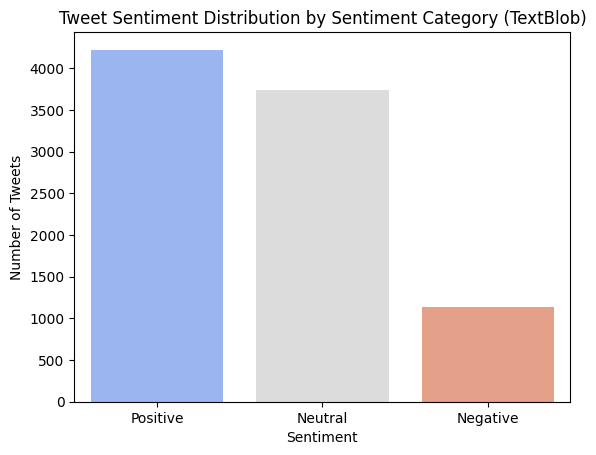

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#counting up total per category
sentiment_counts = df['textblob_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

#plotting
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Tweet Sentiment Distribution by Sentiment Category (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

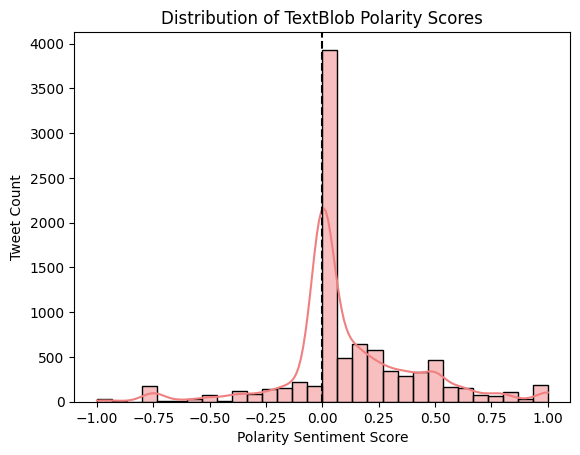

In [14]:
sns.histplot(df['textblob_polarity'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of TextBlob Polarity Scores')
plt.xlabel('Polarity Sentiment Score')
plt.ylabel('Tweet Count')
plt.axvline(0, color='black', linestyle='--')
plt.show()